In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
import seaborn as sns

import statsmodels.api as sm
import arch.unitroot as stat_tests
import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings('ignore')

In [2]:
# data from yahoo finance
goldman = pd.read_csv('./data/GS.csv')[['Date','Close']]
jpmorgan = pd.read_csv('./data/JPM.csv')[['Date','Close']]
morganst = pd.read_csv('./data/MS.csv')[['Date','Close']]
stateind = pd.read_csv('./data/SBIN.NS.csv')[['Date','Close']]

In [3]:
# DATA PREPROCESSING
goldman['Date'] = pd.to_datetime(goldman['Date'], format='%Y-%m-%d')
goldman = goldman.set_index('Date')

jpmorgan['Date'] = pd.to_datetime(jpmorgan['Date'], format='%Y-%m-%d')
jpmorgan = jpmorgan.set_index('Date')

morganst['Date'] = pd.to_datetime(morganst['Date'], format='%Y-%m-%d')
morganst = morganst.set_index('Date')

stateind['Date'] = pd.to_datetime(stateind['Date'], format='%Y-%m-%d')
stateind = stateind.set_index('Date')

In [4]:
### SBI stock X and Y
X_sbi = stateind['Close']
Y_sbi = X_sbi[1:]
Y_sbi.index = X_sbi.index[:-1]

### GS+ stock X and Y
X_gs = pd.DataFrame()
X_gs.index = goldman.index
X_gs['GS_Close'] = goldman['Close']
X_gs['JP_Close'] = jpmorgan['Close']
X_gs['MS_Close'] = morganst['Close']

Y_gs = goldman['Close'][1:]
Y_gs.index = X_gs.index[:-1]
X_gs = X_gs[:-1]

In [5]:
X_gs.head(4)

,GS_Close,JP_Close,MS_Close
Date,,,
1999-05-05,69.1250,53.458332,49.59375
1999-05-06,67.9375,51.708332,47.43750
1999-05-07,74.1250,52.250000,50.34375
1999-05-10,70.6875,52.666668,48.93750


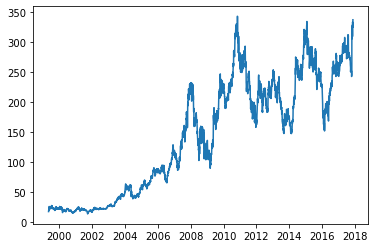

In [6]:
plt.plot(X_sbi)

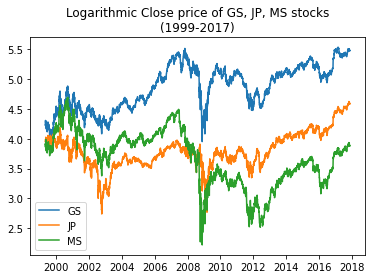

In [6]:
plt.plot(np.log(X_gs['GS_Close']), label='GS')
plt.plot(np.log(X_gs['JP_Close']), label='JP')
plt.plot(np.log(X_gs['MS_Close']), label='MS')
plt.title("Logarithmic Close price of GS, JP, MS stocks\n(1999-2017)")
plt.legend()

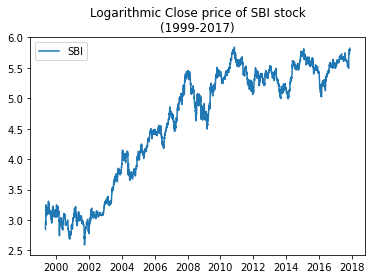

In [7]:
plt.plot(np.log(stateind), label='SBI')
plt.title("Logarithmic Close price of SBI stock\n(1999-2017)")
plt.legend()

In [116]:
mod = SARIMAX(np.log(X_gs['GS_Close']), np.log(X_gs[['JP_Close', 'MS_Close']]))
fit_res = mod.fit()
print(fit_res.summary())

                               SARIMAX Results                                
Dep. Variable:               GS_Close   No. Observations:                 4667
Model:               SARIMAX(1, 0, 0)   Log Likelihood               13599.203
Date:                Mon, 06 Dec 2021   AIC                         -27190.405
Time:                        00:45:59   BIC                         -27164.612
Sample:                             0   HQIC                        -27181.334
                               - 4667                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
JP_Close       0.2664      0.005     55.888      0.000       0.257       0.276
MS_Close       0.4706      0.003    173.722      0.000       0.465       0.476
ar.L1          0.9998   7.38e-05   1.35e+04      0.0

In [120]:
### Splitting Data 
print("GS Data has this many rows:",X_gs.shape[0],";65% of which is approx:",int(X_gs.shape[0]*.65))
print("SBI Data has this many rows:",X_sbi.shape[0],";65% of which is approx:",int(X_sbi.shape[0]*.65))


GS Data has this many rows: 4667 ;65% of which is approx: 3033
SBI Data has this many rows: 4663 ;65% of which is approx: 3030


In [91]:
### so we set limit as first 3036 rows for our useage
print(3036/4667, 3036/4663)

0.6505249625026783 0.6510829937808278


In [5]:
X_train_gs = X_gs[:3036]
Y_train_gs = Y_gs[:3036]

X_test_gs = X_gs[3036:]
Y_test_gs = Y_gs[3036:]

X_train_sbi = X_sbi[:3036]
Y_train_sbi = Y_sbi[:3036]

X_test_sbi = X_sbi[3036:]
Y_test_sbi = Y_sbi[3036:]

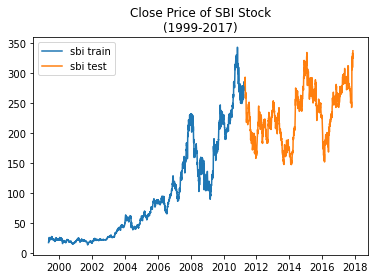

In [14]:
plt.plot(X_train_sbi, label='sbi train')
plt.plot(X_test_sbi, label='sbi test')
plt.title("Close Price of SBI Stock\n(1999-2017)")
plt.legend()
plt.savefig('./plots/SBI-stock.png')

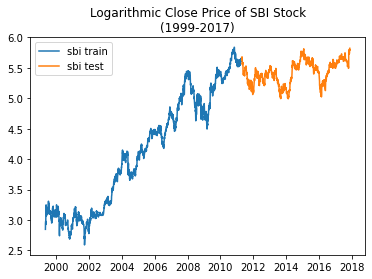

In [15]:
plt.plot(np.log(X_train_sbi), label='sbi train')
plt.plot(np.log(X_test_sbi), label='sbi test')
plt.legend()
plt.title("Logarithmic Close Price of SBI Stock\n(1999-2017)")
plt.savefig('./plots/log-SBI-stock.png')

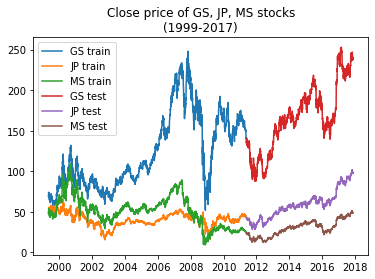

In [16]:
plt.plot((X_train_gs['GS_Close']), label='GS train')
plt.plot((X_train_gs['JP_Close']), label='JP train')
plt.plot((X_train_gs['MS_Close']), label='MS train')

plt.plot((X_test_gs['GS_Close']), label='GS test')
plt.plot((X_test_gs['JP_Close']), label='JP test')
plt.plot((X_test_gs['MS_Close']), label='MS test')
plt.title("Close price of GS, JP, MS stocks\n(1999-2017)")
plt.legend()
plt.savefig('./plots/GS-etc-closeprice.png')

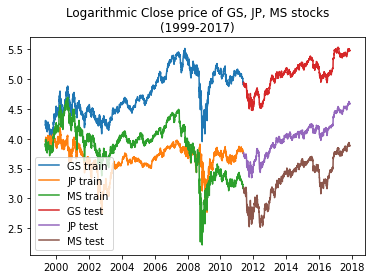

In [17]:
plt.plot(np.log(X_train_gs['GS_Close']), label='GS train')
plt.plot(np.log(X_train_gs['JP_Close']), label='JP train')
plt.plot(np.log(X_train_gs['MS_Close']), label='MS train')

plt.plot(np.log(X_test_gs['GS_Close']), label='GS test')
plt.plot(np.log(X_test_gs['JP_Close']), label='JP test')
plt.plot(np.log(X_test_gs['MS_Close']), label='MS test')
plt.title("Logarithmic Close price of GS, JP, MS stocks\n(1999-2017)")
plt.legend()
plt.savefig('./plots/log-GS-etc-closeprice.png')

In [132]:
mod = SARIMAX(X_train_gs['GS_Close'], X_train_gs[['JP_Close','MS_Close']])
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:               GS_Close   No. Observations:                 3035
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -6532.000
Date:                Mon, 06 Dec 2021   AIC                          13072.001
Time:                        00:56:37   BIC                          13096.073
Sample:                             0   HQIC                         13080.654
                               - 3035                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
JP_Close       0.9924      0.022     45.357      0.000       0.950       1.035
MS_Close       1.0482      0.014     76.010      0.000       1.021       1.075
ar.L1          0.9993      0.001   1930.325      0.0

In [133]:
res.aic

13072.000981629828

In [140]:
### finding best SARIMAX model (cor-related)
pq_lim = 25
aicm = [[float('Inf') for _ in range(pq_lim)] for __ in range(pq_lim)]
bicm = [[float('Inf') for _ in range(pq_lim)] for __ in range(pq_lim)]
for p in range(pq_lim):
    for q in range(pq_lim):
        if p != 0 or q != 0:
            mod = SARIMAX(np.log(X_train_gs['GS_Close']), np.log(X_train_gs[['JP_Close','MS_Close']]),order=(p,1,q))
            res = mod.fit()
            aicm[p][q] = res.aic
            bicm[p][q] = res.bic

abest = np.argwhere(aicm == np.min(aicm))
bbest = np.argwhere(bicm == np.min(bicm))

print("AIC Results:")
print(abest)

print("\nBIC Results:")
print(bbest)

AIC Results:
[[19  0]]

BIC Results:
[[0 1]]


In [153]:
X_train_gs.tail(5)

,GS_Close,JP_Close,MS_Close
Date,,,
2011-05-19,139.339996,44.000000,24.299999
2011-05-20,134.990005,43.130001,23.830000
2011-05-23,135.839996,42.549999,23.690001
2011-05-24,136.339996,42.340000,23.530001
2011-05-25,136.240005,42.270000,23.559999


In [142]:
p1, q1 = 19, 0
p2, q2 = 0, 1
mod1 = SARIMAX(np.log(X_train_gs['GS_Close']), np.log(X_train_gs[['JP_Close','MS_Close']]), order=(p1,1,q1))
mod2 = SARIMAX(np.log(X_train_gs['GS_Close']), np.log(X_train_gs[['JP_Close','MS_Close']]), order=(p2,1,q2))
res1 = mod1.fit()
res2 = mod2.fit()

In [155]:
print("RES 1")
print(res1.summary())
print("\n\nRES 2")
print(res2.summary())

RES 1
                               SARIMAX Results                                
Dep. Variable:               GS_Close   No. Observations:                 3035
Model:              SARIMAX(19, 1, 0)   Log Likelihood                8428.143
Date:                Mon, 06 Dec 2021   AIC                         -16812.286
Time:                        14:15:18   BIC                         -16679.898
Sample:                             0   HQIC                        -16764.693
                               - 3035                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
JP_Close       0.2465      0.007     34.781      0.000       0.233       0.260
MS_Close       0.4780      0.005    105.229      0.000       0.469       0.487
ar.L1         -0.0626      0.013     -4.964   

In [ ]:
pd.to_datetime(goldman['Date'], format='%Y-%m-%d')

In [160]:
X_train_gs.shape

(3035, 3)

In [161]:
pred1 = res1.get_prediction(dynamic=3034)
#pred2 = res2.get_prediction(dynamic='2011-05-24')

In [164]:
Y_train_gs

Date
1999-05-05     67.937500
1999-05-06     74.125000
1999-05-07     70.687500
1999-05-10     70.625000
1999-05-11     73.500000
                 ...    
2011-05-19    134.990005
2011-05-20    135.839996
2011-05-23    136.339996
2011-05-24    136.240005
2011-05-25    136.259995
Name: Close, Length: 3035, dtype: float64

In [152]:
print("MSE for SARIMAX(19,1,0)")
print(np.mean((np.exp(pred1.predicted_mean[1:]) - Y_train_gs[1:])**2))
print("\nMSE for SARIMAX(0,1,1)")
print(np.mean((np.exp(pred2.predicted_mean[1:]) - Y_train_gs[1:])**2))

MSE for SARIMAX(19,1,0)
11.821352409983891

MSE for SARIMAX(0,1,1)
11.827875993646206


In [ ]:
## SARIMAX(19,1,0) has a lower MSE, so we go with SARIMAX(19,1,0)

In [141]:
### finding best ARIMA model (single data)
pq_lim = 25
aicm = [[float('Inf') for _ in range(pq_lim)] for __ in range(pq_lim)]
bicm = [[float('Inf') for _ in range(pq_lim)] for __ in range(pq_lim)]
for p in range(pq_lim):
    for q in range(pq_lim):
        if p != 0 or q != 0:
            mod = ARIMA(np.log(X_train_sbi), order=(p,1,q))
            res = mod.fit()
            aicm[p][q] = res.aic
            bicm[p][q] = res.bic

abest = np.argwhere(aicm == np.min(aicm))
bbest = np.argwhere(bicm == np.min(bicm))

print("AIC Results:")
print(abest)

print("\nBIC Results:")
print(bbest)            

AIC Results:
[[4 4]]

BIC Results:
[[0 1]]


In [10]:
p1, q1 = 4, 4
p2, q2 = 0, 1
arimaa = ARIMA(np.log(X_train_sbi), order=(p1,1,q1))
resa = arimaa.fit()

arimab = ARIMA(np.log(X_train_sbi), order=(p2,1,q2))
resb = arimab.fit()

In [13]:
X_train_sbi

Date
1999-05-05     17.238125
1999-05-06     18.620382
1999-05-07     18.960051
1999-05-10     19.549751
1999-05-11     19.719585
                 ...    
2011-04-08    277.825012
2011-04-11    278.420013
2011-04-13    281.899994
2011-04-15    280.815002
2011-04-18    275.154999
Name: Close, Length: 3035, dtype: float64

In [25]:
print("MSE for ARIMA(4,1,4)")
print(np.mean((np.exp(resa.predict())[1:] - Y_train_sbi[1:])**2)
     )
print("\nMSE for ARIMA(0,1,1)")
print(np.mean((np.exp(resb.predict())[1:] - Y_train_sbi[1:])**2))

MSE for ARIMA(4,1,4)
18.70474780170631

MSE for ARIMA(0,1,1)
18.78904014590805


In [ ]:
### LSTM predictions

In [ ]:
### step 1 for LSTM:
### setup batches

In [18]:
np.array(X_train_sbi).reshape(1,-1)

array([[ 17.238125,  18.620382,  18.960051, ..., 281.899994, 280.815002,
        275.154999]])

In [30]:
# initializing the torch.tensors for our data
tX_train_gs = torch.tensor(np.array(X_train_gs)).float()
tY_train_gs = torch.tensor(np.array(Y_train_gs)).float()

tX_test_gs = torch.tensor(np.array(X_test_gs)).float()
tY_test_gs = torch.tensor(np.array(Y_test_gs)).float()


tX_train_sbi = torch.tensor(np.array(X_train_sbi)).float()
tY_train_sbi = torch.tensor(np.array(Y_train_sbi)).float()

tX_test_sbi = torch.tensor(np.array(X_test_sbi)).float()
tY_test_sbi = torch.tensor(np.array(Y_test_sbi)).float()

In [52]:
X_train_sbi

Date
1999-05-05     17.238125
1999-05-06     18.620382
1999-05-07     18.960051
1999-05-10     19.549751
1999-05-11     19.719585
                 ...    
2011-04-08    277.825012
2011-04-11    278.420013
2011-04-13    281.899994
2011-04-15    280.815002
2011-04-18    275.154999
Name: Close, Length: 3035, dtype: float64

In [40]:
tX_train_gs

tensor([[ 69.1250,  53.4583,  49.5938],
        [ 67.9375,  51.7083,  47.4375],
        [ 74.1250,  52.2500,  50.3438],
        ...,
        [135.8400,  42.5500,  23.6900],
        [136.3400,  42.3400,  23.5300],
        [136.2400,  42.2700,  23.5600]], dtype=torch.float64)

In [25]:
tX_train_gs[5:7,:]

tensor([[73.5000, 54.8750, 53.4062],
        [73.1875, 56.0000, 54.0000]], dtype=torch.float64)

In [39]:
tX_train_gs.reshape(607,5, -1)

tensor([[[ 69.1250,  53.4583,  49.5938],
         [ 67.9375,  51.7083,  47.4375],
         [ 74.1250,  52.2500,  50.3438],
         [ 70.6875,  52.6667,  48.9375],
         [ 70.6250,  53.3333,  50.4062]],

        [[ 73.5000,  54.8750,  53.4062],
         [ 73.1875,  56.0000,  54.0000],
         [ 70.1875,  52.7083,  50.0625],
         [ 68.6250,  52.4167,  50.0312],
         [ 68.6250,  52.5000,  49.4688]],

        [[ 69.3125,  53.4583,  49.5000],
         [ 68.3750,  53.4583,  47.9062],
         [ 67.5000,  52.6250,  47.4375],
         [ 65.3125,  50.5833,  45.3750],
         [ 64.5000,  49.2083,  44.5312]],

        ...,

        [[150.4100,  45.1700,  25.1400],
         [150.1000,  45.0400,  25.2400],
         [149.1200,  44.9600,  25.0800],
         [150.4000,  45.1600,  25.4600],
         [147.8800,  44.2300,  24.6100]],

        [[142.7500,  44.0900,  24.5100],
         [141.4600,  43.1500,  24.1300],
         [140.6000,  42.8800,  23.8800],
         [140.8100,  43.8100,  24.2

In [7]:
print("Goldman train shape:",X_train_gs.shape)
print("Goldman test shape:", X_test_gs.shape)
print("SBI train:",X_train_sbi.shape)
print("SBI test:",X_test_sbi.shape)

Goldman train shape: (3036, 3)
Goldman test shape: (1631, 3)
SBI train: (3036,)
SBI test: (1627,)


In [33]:
tX_train_gs

tensor([[ 69.1250,  53.4583,  49.5938],
        [ 67.9375,  51.7083,  47.4375],
        [ 74.1250,  52.2500,  50.3438],
        ...,
        [135.8400,  42.5500,  23.6900],
        [136.3400,  42.3400,  23.5300],
        [136.2400,  42.2700,  23.5600]], dtype=torch.float64)

In [36]:
tX_train_gs.reshape((3,-1))

tensor([[ 69.1250,  53.4583,  49.5938,  ...,  44.7700,  74.9500,  30.4900],
        [ 44.3300,  76.1000,  31.0400,  ...,  52.5600,  85.6100, 230.7100],
        [ 52.2900,  85.6300, 228.5400,  ..., 136.2400,  42.2700,  23.5600]],
       dtype=torch.float64)

In [27]:
tX_test_sbi.view(-1,1)

tensor([[273.3350],
        [279.5150],
        [286.1150],
        ...,
        [324.9500],
        [333.4000],
        [337.5000]], dtype=torch.float64)

In [57]:
tX_train_gs.reshape(-1,1).shape[0]

9105

In [ ]:
"""

LSTM  (input:3) -> (output:1)
batch

sequence length: 3
batch length:(607)  5 x 607 = 3035

sbi: input_len = 1
gs: input_len = 3

"""

In [59]:
tX_train_gs.shape

torch.Size([3035, 3])

In [60]:
len(tX_train_gs)

3035

In [67]:
tX_train_gs.shape

torch.Size([3035, 3])

In [73]:
print(tX_train_gs[:10])

tensor([[69.1250, 53.4583, 49.5938],
        [67.9375, 51.7083, 47.4375],
        [74.1250, 52.2500, 50.3438],
        [70.6875, 52.6667, 48.9375],
        [70.6250, 53.3333, 50.4062],
        [73.5000, 54.8750, 53.4062],
        [73.1875, 56.0000, 54.0000],
        [70.1875, 52.7083, 50.0625],
        [68.6250, 52.4167, 50.0312],
        [68.6250, 52.5000, 49.4688]], dtype=torch.float64)


In [76]:
tX_train_gs.reshape((607, -1, 3))[:,3:5,:]

tensor([[[ 70.6875,  52.6667,  48.9375],
         [ 70.6250,  53.3333,  50.4062]],

        [[ 68.6250,  52.4167,  50.0312],
         [ 68.6250,  52.5000,  49.4688]],

        [[ 65.3125,  50.5833,  45.3750],
         [ 64.5000,  49.2083,  44.5312]],

        ...,

        [[150.4000,  45.1600,  25.4600],
         [147.8800,  44.2300,  24.6100]],

        [[140.8100,  43.8100,  24.2000],
         [140.8400,  44.0800,  24.3700]],

        [[136.3400,  42.3400,  23.5300],
         [136.2400,  42.2700,  23.5600]]], dtype=torch.float64)

In [79]:
tY_train_gs[3:5]

tensor([70.6250, 73.5000], dtype=torch.float64)

In [8]:
def get_batches(X_, Y_, batch_size, seq_length, inp_length):
    '''Create a generator that returns batches of size
       batch_size x seq_length from arr.
       
       Arguments
       ---------
       arr: Array you want to make batches from
       batch_size: Batch size, the number of sequences per batch
       seq_length: Number of encoded chars in a sequence
    '''
    
    batch_size_total = batch_size * seq_length
    # total number of batches we can make
    n_batches = len(X_)//batch_size_total
    
    # Keep only enough characters to make full batches
    X = X_[:n_batches * batch_size_total]
    Y = Y_[:n_batches * batch_size_total]
    # Reshape into batch_size rows
    X = X.reshape((batch_size, -1, inp_length))
    Y = Y.reshape((batch_size, -1))
    
    # iterate through the array, one sequence at a time
    for n in range(0, X.shape[1], seq_length):
        # The features
        x = X[:, n:n+seq_length,:]
        y = Y[:, n:n+seq_length]
        yield x, y
        

In [107]:
class LSTM_Base(nn.Module):
    def __init__(self, n_input, n_hidden=256, n_layers=2, drop_prob=0.25, n_output=1):
        super().__init__()
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.n_output = n_output
        self.drop_prob = drop_prob
        self.sig = nn.Sigmoid()
        self.relu = nn.ReLU()
        
        self.lstm = nn.LSTM(n_input, n_hidden, n_layers, batch_first=True)
        self.linear1 = nn.Linear(n_hidden, n_output)
        
    def forward(self, x_, h_):
        out, h = self.lstm(x_, h_)
        out = out[:,-1,:]
        out = self.linear1(out)
        out = self.relu(out)
        
        return out, h
        
    def init_hidden(self, batch_size=1):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
                      weight.new(self.n_layers, batch_size, self.n_hidden).zero_())
        return hidden

In [103]:
train_on_gpu=False

In [108]:
def train(net, X_train, y_train,X_test, y_test,inp_length,epochs=10, batch_size=10, seq_length=50,
          lr=0.001, clip=5,val_frac=0.1, print_every=10):
    ''' Training a network 
    
        Arguments
        ---------
        
        net: CharRNN network
        data: data to train the network
        epochs: Number of epochs to train
        batch_size: Number of mini-sequences per mini-batch, aka batch size
        seq_length: Number of character steps per mini-batch
        lr: learning rate
        clip: gradient clipping
        val_frac: Fraction of data to hold out for validation
        print_every: Number of steps for printing training and validation loss
    
    '''
    net.train()
    
    opt = torch.optim.RMSprop(net.parameters(), lr=lr)
    criterion = nn.MSELoss()
    
    
    
    if(train_on_gpu):
        net.cuda()
    counter = 0
    for e in range(epochs):
        # initialize hidden state
        h = net.init_hidden(batch_size)
        
        for inputs, targets in get_batches(X_train, y_train, batch_size, seq_length, inp_length):
            counter += 1
            
            
            #inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            
            if(train_on_gpu):
                inputs, targets = inputs.cuda(), targets.cuda()

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])

            # zero accumulated gradients
            net.zero_grad()
            
            # get the output from the model
            output, h = net(inputs, h)
            
            # calculate the loss and perform backprop
            print(output.shape, targets.shape)
            loss = torch.mean( ( output.reshape(batch_size*seq_length)- targets.reshape(batch_size*seq_length) )**2 )
            loss.backward()
            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)
            opt.step()
            
            # loss stats
            if counter % print_every == 0:
                # Get validation loss
                val_h = net.init_hidden(batch_size)
                val_losses = []
                net.eval()
                for x, y in get_batches(X_test, y_test, batch_size, seq_length, inp_length):
                    # One-hot encode our data and make them Torch tensors
                    #x = one_hot_encode(x, n_chars)
                    #x, y = torch.from_numpy(x), torch.from_numpy(y)
                    
                    # Creating new variables for the hidden state, otherwise
                    # we'd backprop through the entire training history
                    val_h = tuple([each.data for each in val_h])
                    
                    inputs, targets = x, y
                    if(train_on_gpu):
                        inputs, targets = inputs.cuda(), targets.cuda()

                    output, val_h = net(inputs, val_h)
                    val_loss = criterion(output, targets.reshape(batch_size*seq_length))
                
                    val_losses.append(val_loss.item())
                
                net.train() # reset to train mode after iterationg through validation data
                
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.4f}...".format(loss.item()),
                      "Val Loss: {:.4f}".format(np.mean(val_losses)))

In [109]:
ntwrk = LSTM_Base(1)

In [110]:
train(ntwrk, tX_train_sbi, tY_train_sbi, tX_test_sbi, tY_test_sbi, 1)

torch.Size([10, 1]) torch.Size([10, 50])


RuntimeError: shape '[500]' is invalid for input of size 10

In [87]:
ntwrk.parameters

<bound method Module.parameters of LSTM_Base(
  (sig): Sigmoid()
  (relu): ReLU()
  (lstm): LSTM(1, 256, num_layers=2, batch_first=True)
  (linear1): Linear(in_features=256, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=1, bias=True)
)>